In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('kddcup99_csv.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494020 entries, 0 to 494019
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     494020 non-null  int64  
 1   protocol_type                494020 non-null  object 
 2   service                      494020 non-null  object 
 3   flag                         494020 non-null  object 
 4   src_bytes                    494020 non-null  int64  
 5   dst_bytes                    494020 non-null  int64  
 6   land                         494020 non-null  int64  
 7   wrong_fragment               494020 non-null  int64  
 8   urgent                       494020 non-null  int64  
 9   hot                          494020 non-null  int64  
 10  num_failed_logins            494020 non-null  int64  
 11  logged_in                    494020 non-null  int64  
 12  lnum_compromised             494020 non-null  int64  
 13 

In [4]:
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal


In [5]:
data['label'].value_counts()

smurf              280790
neptune            107201
normal              97277
back                 2203
satan                1589
ipsweep              1247
portsweep            1040
warezclient          1020
teardrop              979
pod                   264
nmap                  231
guess_passwd           53
buffer_overflow        30
land                   21
warezmaster            20
imap                   12
rootkit                10
loadmodule              9
ftp_write               8
multihop                7
phf                     4
perl                    3
spy                     2
Name: label, dtype: int64

In [6]:
R2L=['warezmaster','warezclient','spy','phf','multihop','imap','guess_passwd','ftp_write']

U2R=['rootkit','perl','loadmodule','buffer_overflow']
DoS=['smurf','teardrop','back','land','neptune','pod']
Probe=['ipsweep','nmap','portsweep','satan']

In [7]:
def classify(data,label):
    type=[]
    for i in data['label']:
        if i == 'normal':
            type.append('Normal')
        elif i in R2L:
            type.append('R2L')
        elif i in U2R:
            type.append('U2R')
        elif i in DoS:
            type.append('DoS')
        else:
            type.append('Probe')
    return type
data['check']=classify(data,'label')

In [8]:
data.head(10000)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,check
0,0,tcp,http,SF,181,5450,0,0,0,0,...,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal,Normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal,Normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal,Normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal,Normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,smurf,DoS
9996,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,smurf,DoS
9997,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,smurf,DoS
9998,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,smurf,DoS


In [9]:
data1 = data[['src_bytes', 'count', 'service', 'srv_count', 'protocol_type',
       'diff_srv_rate', 'same_srv_rate', 'flag', 'dst_bytes',
       'srv_serror_rate', 'logged_in', 'duration', 'lnum_compromised',
       'wrong_fragment', 'is_guest_login', 'num_failed_logins', 'label', 'check']]

In [10]:
data1.rename(columns = {'label':'attack_types', 'check':'label'}, inplace = True) 

C:\Users\sdjsh\AppData\Local\Temp\ipykernel_16572\1558707122.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1.rename(columns = {'label':'attack_types', 'check':'label'}, inplace = True)


In [11]:
data1.head(10000)

,src_bytes,count,service,srv_count,protocol_type,diff_srv_rate,same_srv_rate,flag,dst_bytes,srv_serror_rate,logged_in,duration,lnum_compromised,wrong_fragment,is_guest_login,num_failed_logins,attack_types,label
0,181,8,http,8,tcp,0.0,1.0,SF,5450,0.0,1,0,0,0,0,0,normal,Normal
1,239,8,http,8,tcp,0.0,1.0,SF,486,0.0,1,0,0,0,0,0,normal,Normal
2,235,8,http,8,tcp,0.0,1.0,SF,1337,0.0,1,0,0,0,0,0,normal,Normal
3,219,6,http,6,tcp,0.0,1.0,SF,1337,0.0,1,0,0,0,0,0,normal,Normal
4,217,6,http,6,tcp,0.0,1.0,SF,2032,0.0,1,0,0,0,0,0,normal,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1032,511,ecr_i,511,icmp,0.0,1.0,SF,0,0.0,0,0,0,0,0,0,smurf,DoS
9996,1032,511,ecr_i,511,icmp,0.0,1.0,SF,0,0.0,0,0,0,0,0,0,smurf,DoS
9997,1032,511,ecr_i,511,icmp,0.0,1.0,SF,0,0.0,0,0,0,0,0,0,smurf,DoS
9998,1032,511,ecr_i,511,icmp,0.0,1.0,SF,0,0.0,0,0,0,0,0,0,smurf,DoS


In [12]:
data1.shape

(494020, 18)

In [13]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494020 entries, 0 to 494019
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   src_bytes          494020 non-null  int64  
 1   count              494020 non-null  int64  
 2   service            494020 non-null  object 
 3   srv_count          494020 non-null  int64  
 4   protocol_type      494020 non-null  object 
 5   diff_srv_rate      494020 non-null  float64
 6   same_srv_rate      494020 non-null  float64
 7   flag               494020 non-null  object 
 8   dst_bytes          494020 non-null  int64  
 9   srv_serror_rate    494020 non-null  float64
 10  logged_in          494020 non-null  int64  
 11  duration           494020 non-null  int64  
 12  lnum_compromised   494020 non-null  int64  
 13  wrong_fragment     494020 non-null  int64  
 14  is_guest_login     494020 non-null  int64  
 15  num_failed_logins  494020 non-null  int64  
 16  at

In [14]:
data1['protocol_type'] = data1['protocol_type'].astype('category')
data1['service'] = data1['service'].astype('category')
data1['flag'] = data1['flag'].astype('category')
cat_columns = data1.select_dtypes(['category']).columns
data1[cat_columns] = data1[cat_columns].apply(lambda x: x.cat.codes)

C:\Users\sdjsh\AppData\Local\Temp\ipykernel_16572\248530944.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['protocol_type'] = data1['protocol_type'].astype('category')
C:\Users\sdjsh\AppData\Local\Temp\ipykernel_16572\248530944.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['service'] = data1['service'].astype('category')
C:\Users\sdjsh\AppData\Local\Temp\ipykernel_16572\248530944.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

In [15]:
data1.head(10000)

,src_bytes,count,service,srv_count,protocol_type,diff_srv_rate,same_srv_rate,flag,dst_bytes,srv_serror_rate,logged_in,duration,lnum_compromised,wrong_fragment,is_guest_login,num_failed_logins,attack_types,label
0,181,8,22,8,1,0.0,1.0,9,5450,0.0,1,0,0,0,0,0,normal,Normal
1,239,8,22,8,1,0.0,1.0,9,486,0.0,1,0,0,0,0,0,normal,Normal
2,235,8,22,8,1,0.0,1.0,9,1337,0.0,1,0,0,0,0,0,normal,Normal
3,219,6,22,6,1,0.0,1.0,9,1337,0.0,1,0,0,0,0,0,normal,Normal
4,217,6,22,6,1,0.0,1.0,9,2032,0.0,1,0,0,0,0,0,normal,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1032,511,14,511,0,0.0,1.0,9,0,0.0,0,0,0,0,0,0,smurf,DoS
9996,1032,511,14,511,0,0.0,1.0,9,0,0.0,0,0,0,0,0,0,smurf,DoS
9997,1032,511,14,511,0,0.0,1.0,9,0,0.0,0,0,0,0,0,0,smurf,DoS
9998,1032,511,14,511,0,0.0,1.0,9,0,0.0,0,0,0,0,0,0,smurf,DoS


In [16]:
df = data1.drop_duplicates(subset=None, keep='first')

In [17]:
df.isna().sum()

src_bytes            0
count                0
service              0
srv_count            0
protocol_type        0
diff_srv_rate        0
same_srv_rate        0
flag                 0
dst_bytes            0
srv_serror_rate      0
logged_in            0
duration             0
lnum_compromised     0
wrong_fragment       0
is_guest_login       0
num_failed_logins    0
attack_types         0
label                0
dtype: int64

In [18]:
df.shape

(99474, 18)

In [19]:
data1.shape

(494020, 18)

In [20]:
df['label'].value_counts()

Normal    73124
DoS       25216
Probe       699
R2L         385
U2R          50
Name: label, dtype: int64

In [21]:
df['attack_types'].value_counts()

normal             73124
neptune            24259
smurf                460
satan                322
warezclient          320
teardrop             312
portsweep            241
back                 154
ipsweep               77
nmap                  59
buffer_overflow       28
pod                   26
warezmaster           20
guess_passwd          12
imap                  12
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
land                   5
phf                    4
perl                   3
spy                    2
Name: attack_types, dtype: int64

In [22]:
df['label'].value_counts()

Normal    73124
DoS       25216
Probe       699
R2L         385
U2R          50
Name: label, dtype: int64

In [23]:
import matplotlib.pyplot as plt
#import seaborn as sns

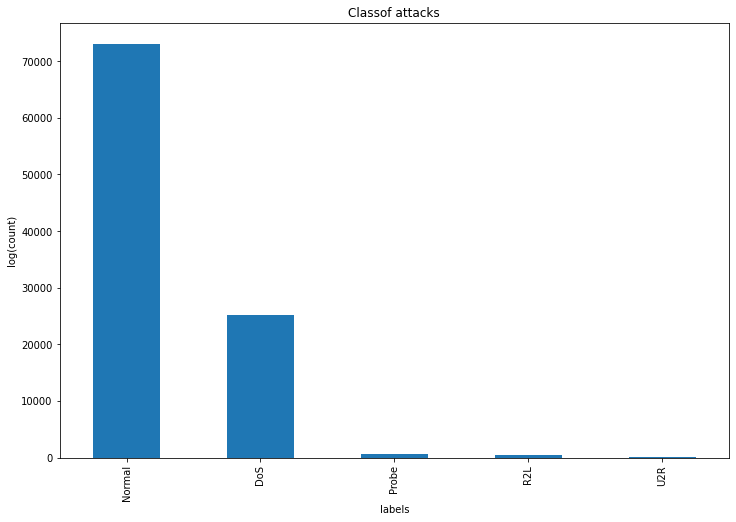

In [24]:
plt.figure(figsize=(12,8))
plt.title('Classof attacks')
df['label'].value_counts().plot(kind='bar')
plt.xlabel("labels")
plt.ylabel("log(count)")
plt.show()

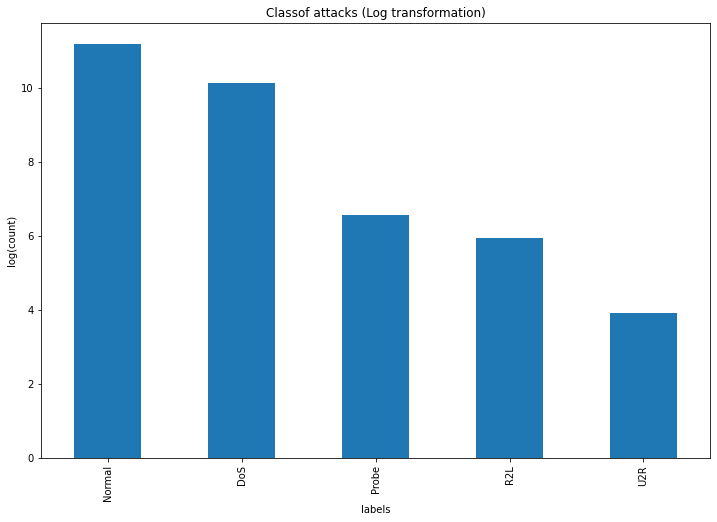

In [25]:
plt.figure(figsize=(12,8))
plt.title('Classof attacks (Log transformation)')
df['label'].value_counts().apply(np.log).plot(kind='bar')
plt.xlabel("labels")
plt.ylabel("log(count)")
plt.show()

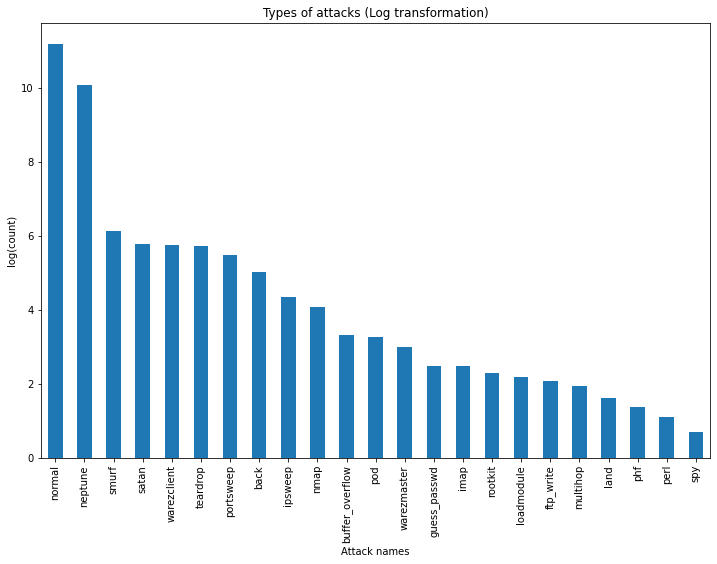

In [26]:
plt.figure(figsize=(12,8))
plt.title("Types of attacks (Log transformation)")
df['attack_types'].value_counts().apply(np.log).plot(kind='bar')
plt.xlabel("Attack names")
plt.ylabel("log(count)")
plt.show()

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99474 entries, 0 to 494019
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   src_bytes          99474 non-null  int64  
 1   count              99474 non-null  int64  
 2   service            99474 non-null  int8   
 3   srv_count          99474 non-null  int64  
 4   protocol_type      99474 non-null  int8   
 5   diff_srv_rate      99474 non-null  float64
 6   same_srv_rate      99474 non-null  float64
 7   flag               99474 non-null  int8   
 8   dst_bytes          99474 non-null  int64  
 9   srv_serror_rate    99474 non-null  float64
 10  logged_in          99474 non-null  int64  
 11  duration           99474 non-null  int64  
 12  lnum_compromised   99474 non-null  int64  
 13  wrong_fragment     99474 non-null  int64  
 14  is_guest_login     99474 non-null  int64  
 15  num_failed_logins  99474 non-null  int64  
 16  attack_types       99

In [28]:
df['label'].value_counts()

Normal    73124
DoS       25216
Probe       699
R2L         385
U2R          50
Name: label, dtype: int64

In [29]:
dummies = pd.get_dummies(df[['label']],drop_first=False)
df = df.drop(['label'],axis=1)
df = pd.concat([df,dummies],axis=1)

In [30]:
df.tail(10000)

,src_bytes,count,service,srv_count,protocol_type,diff_srv_rate,same_srv_rate,flag,dst_bytes,srv_serror_rate,...,lnum_compromised,wrong_fragment,is_guest_login,num_failed_logins,attack_types,label_DoS,label_Normal,label_Probe,label_R2L,label_U2R
465603,0,227,3,14,1,0.06,0.06,1,0,0.00,...,0,0,0,0,neptune,1,0,0,0,0
465604,0,103,45,19,1,0.06,0.18,1,0,0.00,...,0,0,0,0,neptune,1,0,0,0,0
465607,0,264,45,16,1,0.06,0.06,1,0,0.00,...,0,0,0,0,neptune,1,0,0,0,0
465608,0,273,45,18,1,0.06,0.07,1,0,0.00,...,0,0,0,0,neptune,1,0,0,0,0
465610,0,291,53,16,1,0.05,0.05,2,0,0.00,...,0,0,0,0,neptune,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494015,310,4,22,5,1,0.00,1.00,9,1881,0.00,...,0,0,0,0,normal,0,1,0,0,0
494016,282,6,22,6,1,0.00,1.00,9,2286,0.00,...,0,0,0,0,normal,0,1,0,0,0
494017,203,6,22,18,1,0.00,1.00,9,1200,0.11,...,0,0,0,0,normal,0,1,0,0,0
494018,291,6,22,12,1,0.00,1.00,9,1200,0.00,...,0,0,0,0,normal,0,1,0,0,0


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99474 entries, 0 to 494019
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   src_bytes          99474 non-null  int64  
 1   count              99474 non-null  int64  
 2   service            99474 non-null  int8   
 3   srv_count          99474 non-null  int64  
 4   protocol_type      99474 non-null  int8   
 5   diff_srv_rate      99474 non-null  float64
 6   same_srv_rate      99474 non-null  float64
 7   flag               99474 non-null  int8   
 8   dst_bytes          99474 non-null  int64  
 9   srv_serror_rate    99474 non-null  float64
 10  logged_in          99474 non-null  int64  
 11  duration           99474 non-null  int64  
 12  lnum_compromised   99474 non-null  int64  
 13  wrong_fragment     99474 non-null  int64  
 14  is_guest_login     99474 non-null  int64  
 15  num_failed_logins  99474 non-null  int64  
 16  attack_types       99

In [32]:
X=df.drop(['label_DoS','label_Normal','label_Probe','label_U2R','label_R2L','attack_types'],axis=1)
#X=df.drop(['attack_types','label'],axis=1)
Y=df[['label_Normal','label_DoS','label_Probe','label_R2L','label_U2R']]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.35,random_state=69)

In [33]:
Y

,label_Normal,label_DoS,label_Probe,label_R2L,label_U2R
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0
...,...,...,...,...,...
494015,1,0,0,0,0
494016,1,0,0,0,0
494017,1,0,0,0,0
494018,1,0,0,0,0


In [34]:
%matplotlib inline

import itertools
import numpy as np

# import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# from sklearn import datasets


from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix

from sklearn.multiclass import OneVsRestClassifier
np.random.seed(0)

In [35]:
# models = {
#     'randomForest':{
#         'model':RandomForestClassifier(),
#         'params':{
#             'n_estimators':[10,20,30]
#         }
#     },
#     'KNN':{
#         'model':KNeighborsClassifier(),
#         'params':{
#             'n_neighbors':[3,4,5]
#         }
#     },
# #     'svm':{
# #         'model':SVC(gamma='scale'),
# #         'params':{
# #             'C':[1,10,20],
# #             'kernel':['rbf','linear']
# #         }
# #     },

#     'DT':{
#         'model':DecisionTreeClassifier(criterion='entropy'),
#         'params':{
#             'max_depth':[4,5,6]
#         }
#     },
# #     'AdaBoost':{
# #         'model':AdaBoostClassifier(DecisionTreeClassifier(criterion='entropy'), random_state=0),
# #         'params':{
# #             'n_estimators':[100, 200, 1000]
# #         }
# #     },
#     'Logistic Regression':{
#         'model': LogisticRegression(),
#         'params':{
#             'max_iter':[1100000, 1200000, 1300000]
#         }
#     }
# }

In [36]:
# scores = []

# for model_name, mp in models.items():
#     clf = GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
#     clf.fit(X_train, y_train)
#     scores.append({
#         'model':model_name,
#         'test_score':clf.best_score_,
#         'best params':clf.best_params_
#     }
#     )

In [37]:
# scores

In [38]:
# models_knn={
#     'KNN':{
#         'model':KNeighborsClassifier(),
#         'params':{
#             'n_neighbors':[3,4,5]
#         }
#     }
# }

In [39]:
# scores = []

# for model_name, mp in models_knn.items():
#     clf = GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
#     clf.fit(X_train, y_train)
#     scores.append({
#         'model':model_name,
#         'test_score':clf.best_score_,
#         'best params':clf.best_params_
#     }
#     )

In [40]:
# scores

In [41]:
# models_dt ={
#      'DT':{
#         'model':DecisionTreeClassifier(criterion='entropy'),
#         'params':{
#             'max_depth':[4,5,6]
#         }
#     }
# }

In [42]:
# scores = []

# for model_name, mp in models_dt.items():
#     clf = GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
#     clf.fit(X_train, y_train)
#     scores.append({
#         'model':model_name,
#         'test_score':clf.best_score_,
#         'best params':clf.best_params_
#     }
#     )

In [43]:
# scores

In [44]:
# models_adaboost ={
#     'Logistic Regression':{
#         'model': LogisticRegression(),
#         'params':{
#             'max_iter':[1100000, 1200000, 1300000]
#         }
#     }
# }

# np.shape(y_train)

# print(y_train.argmax(axis=1))
# array1 = np.array(y_train)
# result = array1.flatten()
# np.shape(result)


In [45]:

# for model_name, mp in models_adaboost.items():
#     clf = GridSearchCV(mp['model'], mp['params'] ,cv=5, return_train_score=False)
#     clf.fit(X_train, result)
#     scores.append({
#         'model':model_name,
#         'test_score':clf.best_score_,
#         'best params':clf.best_params_
#     }
#     )

In [46]:
# import time
# svm = SVC()
# start_time = time.time()
# result= svm.fit(X_train, y_train)
# end_time = time.time()
# print("Time : ", end_time-start_time)

In [47]:
# import seaborn as sns
# models = ['randomForest', 'KNN', 'SVM', 'DT', 'Adaboost']
# test = [0.9982, 0.8723, 0.8999, 0.9555, 0.9897]
# train = [0.9999, 0.9888, 0.9777, 0.9234, 0.9567]

# plt.plot(models, test, label='test')
# plt.plot(models, train, label='train')
# plt.xlabel('Models Name')
# plt.ylabel('training/testing Score')
# plt.title('Training v/s Testing Accuracy')
# plt.legend()
# # sns.lineplot(models, test, train)

In [48]:
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.naive_bayes import GaussianNB
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import AdaBoostClassifier
# from sklearn.svm import SVC
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score, precision_score, classification_report, confusion_matrix, f1_score, \
#                             recall_score, roc_auc_score,roc_curve


In [49]:
# models={
#     "KNN" : KNeighborsClassifier(n_neighbors=3),
#     "Decision Tree": DecisionTreeClassifier(criterion='entropy' ,max_depth=4),
#     "Random Forest": RandomForestClassifier(n_estimators=30),
# #     "SVM": SVC(gamma= 'scale'),
# #     "Naive Bayes": GaussianNB(),
# #     "Adaboost": AdaBoostClassifier(DecisionTreeClassifier(criterion='entropy' ,max_depth=4), n_estimators=100, random_state=0),
#     "Logistic Regression": LogisticRegression(max_iter=1200000)
# }
# for i in range(len(list(models))):
#     model = list(models.values())[i]
#     model.fit(X_train, y_train) #training model
    
#     #Make predictions 
#     y_train_pred = model.predict(X_train)
#     y_test_pred = model.predict(X_test)
    
#     #training set performance
#     model_train_accuracy = accuracy_score(y_train, y_train_pred)
#     model_train_precision = precision_score(y_train, y_train_pred, average='weighted')
#     model_train_f1score = f1_score(y_train, y_train_pred, average='weighted')
#     model_train_recall = recall_score(y_train, y_train_pred, average='weighted')
# #     model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)
    
    
#     #test set performance
#     model_test_accuracy = accuracy_score(y_test, y_test_pred)
#     model_test_precision = precision_score(y_test, y_test_pred, average='weighted')
#     model_test_f1score = f1_score(y_test, y_test_pred, average='weighted')
#     model_test_recall = recall_score(y_test, y_test_pred, average='weighted')
# #     model_test_rocauc_score = roc_auc_score(y_test, y_test_pred)
    
#     print(list(models.keys())[i])
    
#     print('Model performance for training set')
#     print("- Accuracy : {:.4f}".format(model_train_accuracy))
#     print("- Precision : {:.4f}".format(model_train_precision))
#     print("- F1 Score : {:.4f}".format(model_train_f1score))
#     print("- Recall : {:.4f}".format(model_train_recall))
# #     print("- Roc_Auc Score : {:.4f}".format(model_train_rocauc_score))
    
    
#     print("------------------------------------------")
    
#     print('Model performance for test set')
#     print("- Accuracy : {:.4f}".format(model_test_accuracy))
#     print("- Precision : {:.4f}".format(model_test_precision))
#     print("- F1 Score : {:.4f}".format(model_test_f1score))
#     print("- Recall : {:.4f}".format(model_test_recall))
# #     print("- Roc_Auc Score : {:.4f}".format(model_test_rocauc_score))
    
#     print('='*35)
#     print('\n')


In [52]:
clf1 = RandomForestClassifier()
clf2 = KNeighborsClassifier(n_neighbors=3)    
clf3 = BaggingClassifier(base_estimator=clf1, n_estimators=30)
clf4 = DecisionTreeClassifier(criterion='entropy')
clf5 = BaggingClassifier(base_estimator=clf2, n_estimators=3)

In [53]:


label = ['Random Forest', 'K-NN', 'Decision Tree','Bagging- Random Forest' , 'Bagging-KNN']
clf_list = [clf1, clf2,  clf4, clf3,  clf5]

gs = gridspec.GridSpec(2, 2)
grid = itertools.product([0,1],repeat=2)


for clf, label, grd in zip(clf_list, label, grid):        
    scores = cross_val_score(clf, X_train, y_train, cv=3, scoring='accuracy')
    print("Accuracy: %.4f (+/- %.4f) [%s]" %(scores.mean(), scores.std(), label))
    m = OneVsRestClassifier(clf)
    m.fit(X_train,y_train )
    pred=m.predict(X_test)
    print(classification_report(y_test,pred))
    ytt=y_test.to_numpy()
    #ptt=pred.to_numpy()
    print(confusion_matrix(ytt.argmax(axis=1),pred.argmax(axis=1)))

Accuracy: 0.9983 (+/- 0.0002) [Random Forest]


C:\Users\sdjsh\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     25496
           1       1.00      1.00      1.00      8932
           2       0.95      0.96      0.95       240
           3       0.97      0.88      0.92       137
           4       0.86      0.55      0.67        11

   micro avg       1.00      1.00      1.00     34816
   macro avg       0.95      0.88      0.91     34816
weighted avg       1.00      1.00      1.00     34816
 samples avg       1.00      1.00      1.00     34816

[[25479     4     8     4     1]
 [    1  8929     2     0     0]
 [    5     6   229     0     0]
 [   16     1     0   120     0]
 [    4     0     1     0     6]]
Accuracy: 0.9951 (+/- 0.0002) [K-NN]


C:\Users\sdjsh\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     25496
           1       0.99      1.00      0.99      8932
           2       0.90      0.64      0.75       240
           3       0.99      0.89      0.94       137
           4       0.50      0.45      0.48        11

   micro avg       1.00      1.00      1.00     34816
   macro avg       0.88      0.80      0.83     34816
weighted avg       1.00      1.00      1.00     34816
 samples avg       1.00      1.00      1.00     34816

[[25467    11    12     1     5]
 [   12  8916     4     0     0]
 [   22    64   154     0     0]
 [   15     0     0   122     0]
 [    5     0     1     0     5]]
Accuracy: 0.9981 (+/- 0.0001) [Decision Tree]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     25496
           1       1.00      1.00      1.00      8932
           2       0.95      0.95      0.95       240
           3       0.96     

C:\Users\sdjsh\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ValueError: 
All the 3 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\sdjsh\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sdjsh\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_bagging.py", line 297, in fit
    return self._fit(X, y, self.max_samples, sample_weight=sample_weight)
  File "C:\Users\sdjsh\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_bagging.py", line 353, in _fit
    y = self._validate_y(y)
  File "C:\Users\sdjsh\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_bagging.py", line 760, in _validate_y
    y = column_or_1d(y, warn=True)
  File "C:\Users\sdjsh\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py", line 1156, in column_or_1d
    raise ValueError(
ValueError: y should be a 1d array, got an array of shape (43105, 5) instead.

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\sdjsh\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sdjsh\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_bagging.py", line 297, in fit
    return self._fit(X, y, self.max_samples, sample_weight=sample_weight)
  File "C:\Users\sdjsh\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_bagging.py", line 353, in _fit
    y = self._validate_y(y)
  File "C:\Users\sdjsh\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_bagging.py", line 760, in _validate_y
    y = column_or_1d(y, warn=True)
  File "C:\Users\sdjsh\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py", line 1156, in column_or_1d
    raise ValueError(
ValueError: y should be a 1d array, got an array of shape (43106, 5) instead.


In [ ]:
import pickle 

In [ ]:
filename = 'finalized_model.sav'

In [ ]:
pickle.dump(m, open(filename, 'wb'))


In [ ]:
loaded_model = pickle.load(open(filename, 'rb'))

In [ ]:
new = X_test.to_numpy()

In [ ]:
new[0]

In [ ]:
result = loaded_model.predict([new[593]])
print(result)